## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_dataset = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "left")

# Display the data table for preview
combined_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
unique_mice = len(combined_dataset["Mouse ID"].unique())
unique_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_dataset.loc[combined_dataset.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_dataset.loc[combined_dataset["Mouse ID"]== "g989"]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_dataset = combined_dataset.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
cleaned_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice2 = len(cleaned_dataset["Mouse ID"].unique())
unique_mice2

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_data = cleaned_dataset.groupby(["Drug Regimen"])
tumor_mean = drug_data["Tumor Volume (mm3)"].mean()
tumor_median = drug_data["Tumor Volume (mm3)"].median()
tumor_variance = drug_data["Tumor Volume (mm3)"].var()
tumor_sd = drug_data["Tumor Volume (mm3)"].std()
tumor_sem = drug_data["Tumor Volume (mm3)"].sem()

drug_data_summary = pd.DataFrame({"Mean": tumor_mean, "Median": tumor_median, "Variance": tumor_variance, "Standard Deviation": tumor_sd, "SEM": tumor_sem})
drug_data_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_data_summary_aggregation = drug_data["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
drug_data_summary_aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

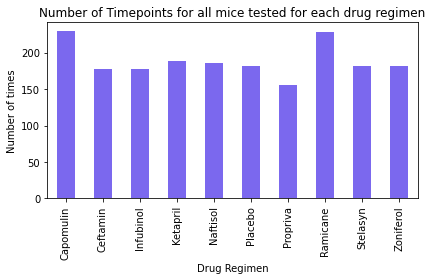

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_bar_data = cleaned_dataset.groupby(["Drug Regimen"]).count()["Mouse ID"] 

mice_bar_chart = mice_bar_data.plot(kind = "bar", color = "mediumslateblue")
mice_bar_chart.set_xlabel("Drug Regimen")
mice_bar_chart.set_ylabel("Number of times")
mice_bar_chart.set_title("Number of Timepoints for all mice tested for each drug regimen")
plt.tight_layout()
plt.show()

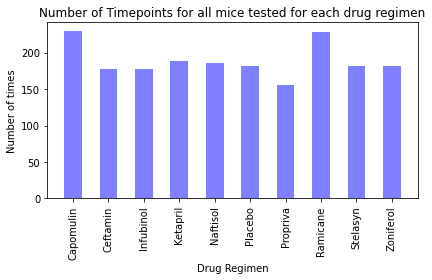

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_bar_data_2 = cleaned_dataset.groupby("Drug Regimen")
mice_bar_data_3 = pd.DataFrame(mice_bar_data_2["Drug Regimen"].count())

x_axis = np.arange(len(mice_bar_data_3["Drug Regimen"]))
plt.bar(x_axis, mice_bar_data, color="blue", alpha = 0.5, align = "center", width = 0.5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list(mice_bar_data_3.index), rotation="vertical")

plt.title("Number of Timepoints for all mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of times")

plt.tight_layout()
plt.show()

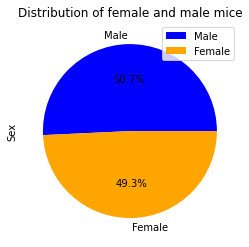

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender_pie_data = pd.DataFrame(cleaned_dataset["Sex"].value_counts())
colors = ["blue", "orange"]
mice_gender_pie_chart = mice_gender_pie_data.plot(kind= "pie", y = "Sex", autopct="%1.1f%%", title="Distribution of female and male mice",colors=colors)

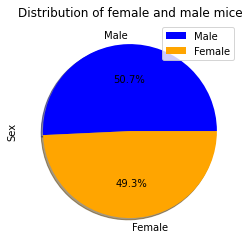

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender_pie = cleaned_dataset["Sex"].value_counts()
mice_gender_pie_data_1 = list(mice_gender_pie.index.values)
mice_gender_pie_data_2 = list(mice_gender_pie.values)
colors = ["blue", "orange"]
plt.pie(mice_gender_pie_data_2, labels=mice_gender_pie_data_1, colors=colors, autopct="%1.1f%%", shadow=True)
plt.title("Distribution of female and male mice")
plt.ylabel("Sex")
plt.legend(mice_gender_pie_data_1)


## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
drugs_treatment_regimen = cleaned_dataset[cleaned_dataset["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

greatest_timepoint_data = pd.DataFrame(drugs_treatment_regimen.groupby("Mouse ID").max()["Timepoint"])
greatest_timepoint_data.reset_index().head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_grouped_df = pd.merge(greatest_timepoint_data,cleaned_dataset, how="left",on=["Mouse ID", "Timepoint"])
merged_grouped_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

drugs_treatment_regimen_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_data = []

for drug in drugs_treatment_regimen_names:
    tumor_volume_data = merged_grouped_df["Tumor Volume (mm3)"].loc[merged_grouped_df["Drug Regimen"] == drug]
    tumor_data.append(tumor_volume_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
    quartiles = tumor_volume_data.quantile([.25,.5,.75])
    lowerq = (quartiles[0.25]).round(2)
    upperq = (quartiles[0.75]).round(2)
    iqr = (upperq-lowerq).round(2)
    lower_bound = (lowerq - (1.5*iqr)).round(2)
    upper_bound = (upperq + (1.5*iqr)).round(2)
    outliers_count = (tumor_volume_data.loc[(merged_grouped_df["Tumor Volume (mm3)"] >= upper_bound) | (merged_grouped_df["Tumor Volume (mm3)"] <= lower_bound)]).count()

    print(f"{drug}- ")
    print(f"Interquartile Range (IQR): {iqr}")
    print(f"Lower quartile: {lowerq}")
    print(f"Upper quartile: {upperq}")
    print(f"Values below {lower_bound} and values above {upper_bound} = outlier")
    print(f"Number of outliers: {outliers_count}")
    print("-" * 30)
        

Capomulin- 
Interquartile Range (IQR): 7.78
Lower quartile: 32.38
Upper quartile: 40.16
Values below 20.71 and values above 51.83 = outlier
Number of outliers: 0
------------------------------
Ramicane- 
Interquartile Range (IQR): 9.1
Lower quartile: 31.56
Upper quartile: 40.66
Values below 17.91 and values above 54.31 = outlier
Number of outliers: 0
------------------------------
Infubinol- 
Interquartile Range (IQR): 11.48
Lower quartile: 54.05
Upper quartile: 65.53
Values below 36.83 and values above 82.75 = outlier
Number of outliers: 1
------------------------------
Ceftamin- 
Interquartile Range (IQR): 15.58
Lower quartile: 48.72
Upper quartile: 64.3
Values below 25.35 and values above 87.67 = outlier
Number of outliers: 0
------------------------------


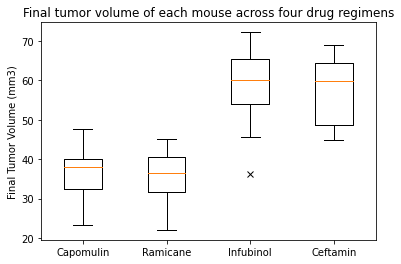

In [75]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='x')
plt.boxplot(tumor_data, flierprops=flierprops)
plt.title("Final tumor volume of each mouse across four drug regimens")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], drugs_treatment_regimen_names)
plt.show()

## Line and Scatter Plots

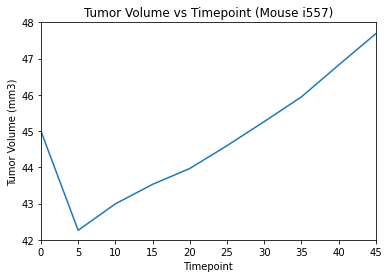

In [77]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_capomulin_treated = cleaned_dataset.loc[cleaned_dataset["Drug Regimen"] == "Capomulin"]
mouse_number_i557 = mouse_capomulin_treated.loc[mouse_capomulin_treated["Mouse ID"] == "i557"]
plt.plot(mouse_number_i557["Timepoint"], mouse_number_i557["Tumor Volume (mm3)"])
plt.xlim([0, 45])
plt.ylim([42, 48])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Timepoint (Mouse i557)")
plt.show()

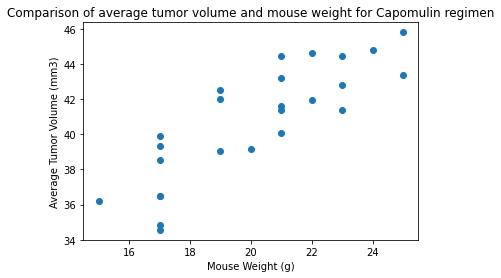

In [97]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_capomulin_treated_mean = mouse_capomulin_treated.groupby(["Mouse ID"]).mean()
plt.scatter(mouse_capomulin_treated_mean["Weight (g)"], mouse_capomulin_treated_mean["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Comparison of average tumor volume and mouse weight for Capomulin regimen")
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.84
R-squared value: 0.71


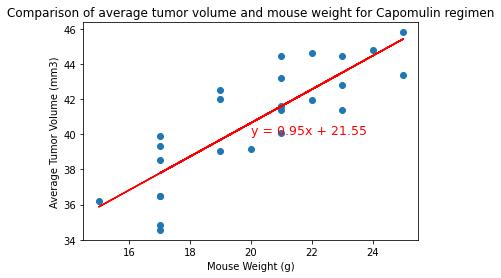

In [121]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

Correlation = st.pearsonr(mouse_capomulin_treated_mean["Weight (g)"],mouse_capomulin_treated_mean["Tumor Volume (mm3)"])[0]
print(f"Correlation Coefficient: {round(Correlation,2)}")

x_values = mouse_capomulin_treated_mean["Weight (g)"]
y_values = mouse_capomulin_treated_mean["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(mouse_capomulin_treated_mean["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,40), color = "red", fontsize=12.5)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Comparison of average tumor volume and mouse weight for Capomulin regimen")
print(f"R-squared value: {round(rvalue**2, 2)}")
plt.show()